In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


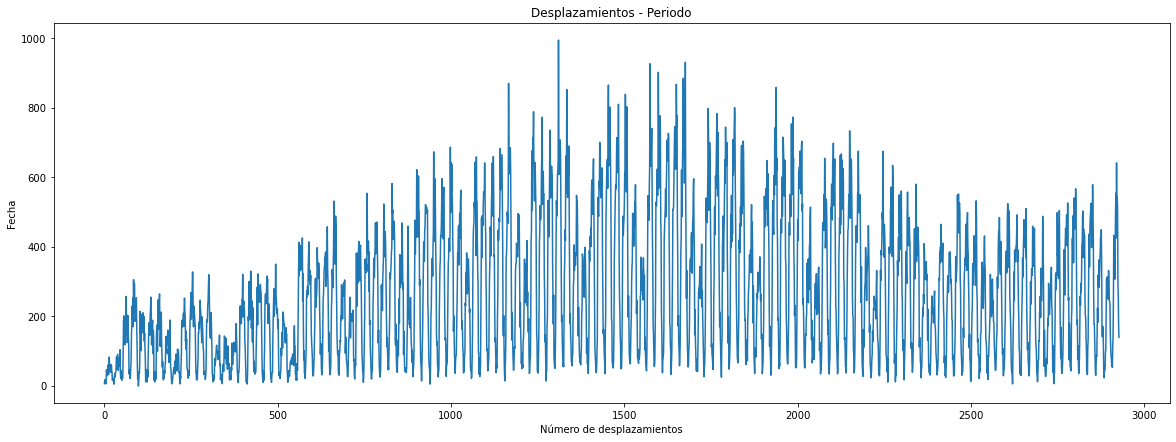

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Dividimos el periodo 1 en 2 subconjuntos - Desescalada y Nueva normalidad
## Desescalada: 2 Mayo - 8 Junio

In [7]:
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoDesescalada = Periodo1.loc[mask]

## Nueva normalidad: 9 Junio - 31 Agosto

In [8]:
start_date = pd.Timestamp('2020-06-09')
end_date = pd.Timestamp('2020-08-31 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoNnormalidad = Periodo1.loc[mask]

In [9]:
def est_Lunes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)

def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)

def Regressor8AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 8:                 
        valor = Train8AM_D.loc[fila]
        valor = valor.y        
        fila += 1
    else:
        valor = 0    
    return (valor)

def Regressor8AMTest(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 8:                 
        valor = Test8AM_D.loc[fila]
        valor = valor.y        
        fila += 1
    else:
        valor = 0    
    return (valor)


PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)

PeriodoNnormalidad['Lunes'] = PeriodoNnormalidad['ds'].apply(est_Lunes)
 

PeriodoDesescalada['Lunes2AM'] = PeriodoDesescalada['ds'].apply(est_Lunes2AM)
PeriodoNnormalidad['Lunes2AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes2AM)

PeriodoDesescalada['Lunes3AM'] = PeriodoDesescalada['ds'].apply(est_Lunes3AM)
PeriodoNnormalidad['Lunes3AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes3AM)

PeriodoDesescalada['Lunes4AM'] = PeriodoDesescalada['ds'].apply(est_Lunes4AM)
PeriodoNnormalidad['Lunes4AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes4AM)

PeriodoDesescalada['Lunes5AM'] = PeriodoDesescalada['ds'].apply(est_Lunes5AM)
PeriodoNnormalidad['Lunes5AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes5AM)

PeriodoDesescalada['Lunes6AM'] = PeriodoDesescalada['ds'].apply(est_Lunes6AM)
PeriodoNnormalidad['Lunes6AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes6AM)

PeriodoDesescalada['Lunes7AM'] = PeriodoDesescalada['ds'].apply(est_Lunes7AM)
PeriodoNnormalidad['Lunes7AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes7AM)

PeriodoDesescalada['Lunes8AM'] = PeriodoDesescalada['ds'].apply(est_Lunes8AM)
PeriodoNnormalidad['Lunes8AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes8AM)

PeriodoDesescalada['Lunes9AM'] = PeriodoDesescalada['ds'].apply(est_Lunes9AM)
PeriodoNnormalidad['Lunes9AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes9AM)

PeriodoDesescalada['Lunes10AM'] = PeriodoDesescalada['ds'].apply(est_Lunes10AM)
PeriodoNnormalidad['Lunes10AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes10AM)

PeriodoDesescalada['Lunes11AM'] = PeriodoDesescalada['ds'].apply(est_Lunes11AM)
PeriodoNnormalidad['Lunes11AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes11AM)

PeriodoDesescalada['Lunes12PM'] = PeriodoDesescalada['ds'].apply(est_Lunes12PM)
PeriodoNnormalidad['Lunes12PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes12PM)

PeriodoDesescalada['Lunes13PM'] = PeriodoDesescalada['ds'].apply(est_Lunes13PM)
PeriodoNnormalidad['Lunes13PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes13PM)

PeriodoDesescalada['Lunes14PM'] = PeriodoDesescalada['ds'].apply(est_Lunes14PM)
PeriodoNnormalidad['Lunes14PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes14PM)

PeriodoDesescalada['Lunes15PM'] = PeriodoDesescalada['ds'].apply(est_Lunes15PM)
PeriodoNnormalidad['Lunes15PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes15PM)

PeriodoDesescalada['Lunes16PM'] = PeriodoDesescalada['ds'].apply(est_Lunes16PM)
PeriodoNnormalidad['Lunes16PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes16PM)

PeriodoDesescalada['Lunes17PM'] = PeriodoDesescalada['ds'].apply(est_Lunes17PM)
PeriodoNnormalidad['Lunes17PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes17PM)

PeriodoDesescalada['Lunes18PM'] = PeriodoDesescalada['ds'].apply(est_Lunes18PM)
PeriodoNnormalidad['Lunes18PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes18PM)

PeriodoDesescalada['Lunes19PM'] = PeriodoDesescalada['ds'].apply(est_Lunes19PM)
PeriodoNnormalidad['Lunes19PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes19PM)

PeriodoDesescalada['Lunes20PM'] = PeriodoDesescalada['ds'].apply(est_Lunes20PM)
PeriodoNnormalidad['Lunes20PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes20PM)

PeriodoDesescalada['Lunes21PM'] = PeriodoDesescalada['ds'].apply(est_Lunes21PM)
PeriodoNnormalidad['Lunes21PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes21PM)

PeriodoDesescalada['Lunes22PM'] = PeriodoDesescalada['ds'].apply(est_Lunes22PM)
PeriodoNnormalidad['Lunes22PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes22PM)

PeriodoDesescalada['Lunes23PM'] = PeriodoDesescalada['ds'].apply(est_Lunes23PM)
PeriodoNnormalidad['Lunes23PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes23PM)

PeriodoDesescalada['Lunes24AM'] = PeriodoDesescalada['ds'].apply(est_Lunes24AM)
PeriodoNnormalidad['Lunes24AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes24AM)


/tmp/ipykernel_4461/3755524134.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_4461/3755524134.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_4461/3755524134.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [10]:
PeriodoDesescalada = PeriodoDesescalada.set_index('ds')
PeriodoNnormalidad = PeriodoNnormalidad.set_index('ds')

In [11]:
#Desescalada
train_end_D = datetime.datetime(2020,6,7,23,0,0)
test_end_D = datetime.datetime(2020,6,8,23,0,0)

train_data_D = PeriodoDesescalada[:train_end_D]
test_data_D = PeriodoDesescalada[train_end_D + timedelta(hours=1):test_end_D]

#Nueva Normalidad
train_end_N = datetime.datetime(2020,8,30,23,0,0)
test_end_N = datetime.datetime(2020,8,31,23,0,0)

train_data_N = PeriodoNnormalidad[:train_end_N]
test_data_N = PeriodoNnormalidad[train_end_N + timedelta(hours=1):test_end_N]

In [12]:
train_data_D = train_data_D.reset_index()
train_data_N = train_data_N.reset_index()

test_data_D = test_data_D.reset_index()
test_data_N = test_data_N.reset_index()

# Ajustamos el periodo de Fourier-Horas con el periodo de datos entrenamiento


In [13]:
##################Entrenamiento######################
mask3AM_D = (train_data_D['Lunes3AM'] == True)
mask8AM_D = (train_data_D['Lunes8AM'] == True)
mask14PM_D = (train_data_D['Lunes14PM'] == True)
mask16PM_D = (train_data_D['Lunes16PM'] == True)

mask3AM_N = (train_data_N['Lunes3AM'] == True)
mask8AM_N = (train_data_N['Lunes8AM'] == True)
mask14PM_N = (train_data_N['Lunes14PM'] == True)
mask16PM_N = (train_data_N['Lunes16PM'] == True)

Train3AM_D = train_data_D.loc[mask3AM_D]
Train8AM_D = train_data_D.loc[mask8AM_D]
Train14PM_D = train_data_D.loc[mask14PM_D]
Train16PM_D = train_data_D.loc[mask16PM_D]

Train3AM_N = train_data_N.loc[mask3AM_N]
Train8AM_N = train_data_N.loc[mask8AM_N]
Train14PM_N = train_data_N.loc[mask14PM_N]
Train16PM_N = train_data_N.loc[mask16PM_N]

#############Prueba##################
mask3AM_D = (test_data_D['Lunes3AM'] == True)
mask8AM_D = (test_data_D['Lunes8AM'] == True)
mask14PM_D = (test_data_D['Lunes14PM'] == True)
mask16PM_D = (test_data_D['Lunes16PM'] == True)

mask3AM_N = (test_data_N['Lunes3AM'] == True)
mask8AM_N = (test_data_N['Lunes8AM'] == True)
mask14PM_N = (test_data_N['Lunes14PM'] == True)
mask16PM_N = (test_data_N['Lunes16PM'] == True)

Test3AM_D = test_data_D.loc[mask3AM_D]
Test8AM_D = test_data_D.loc[mask8AM_D]
Test14PM_D = test_data_D.loc[mask14PM_D]
Test16PM_D = test_data_D.loc[mask16PM_D]

Test3AM_N = test_data_N.loc[mask3AM_N]
Test8AM_N = test_data_N.loc[mask8AM_N]
Test14PM_N = test_data_N.loc[mask14PM_N]
Test16PM_N = test_data_N.loc[mask16PM_N]

In [14]:
start8AM_D = Train8AM_D.iloc[0]['ds']
end8AM_D = Train8AM_D.iloc[-1]['ds'] 
N_Dias = pd.date_range(start8AM_D, end8AM_D, freq='D')
print(len(N_Dias))
print(N_Dias)

29
DatetimeIndex(['2020-05-04 08:00:00', '2020-05-05 08:00:00',
               '2020-05-06 08:00:00', '2020-05-07 08:00:00',
               '2020-05-08 08:00:00', '2020-05-09 08:00:00',
               '2020-05-10 08:00:00', '2020-05-11 08:00:00',
               '2020-05-12 08:00:00', '2020-05-13 08:00:00',
               '2020-05-14 08:00:00', '2020-05-15 08:00:00',
               '2020-05-16 08:00:00', '2020-05-17 08:00:00',
               '2020-05-18 08:00:00', '2020-05-19 08:00:00',
               '2020-05-20 08:00:00', '2020-05-21 08:00:00',
               '2020-05-22 08:00:00', '2020-05-23 08:00:00',
               '2020-05-24 08:00:00', '2020-05-25 08:00:00',
               '2020-05-26 08:00:00', '2020-05-27 08:00:00',
               '2020-05-28 08:00:00', '2020-05-29 08:00:00',
               '2020-05-30 08:00:00', '2020-05-31 08:00:00',
               '2020-06-01 08:00:00'],
              dtype='datetime64[ns]', freq='D')


In [15]:
start8AM_N = Train8AM_N.iloc[0]['ds']
end8AM_N = Train8AM_N.iloc[-1]['ds'] 
N_Dias = pd.date_range(start8AM_N, end8AM_N, freq='D')
print(len(N_Dias))
print(N_Dias)

71
DatetimeIndex(['2020-06-15 08:00:00', '2020-06-16 08:00:00',
               '2020-06-17 08:00:00', '2020-06-18 08:00:00',
               '2020-06-19 08:00:00', '2020-06-20 08:00:00',
               '2020-06-21 08:00:00', '2020-06-22 08:00:00',
               '2020-06-23 08:00:00', '2020-06-24 08:00:00',
               '2020-06-25 08:00:00', '2020-06-26 08:00:00',
               '2020-06-27 08:00:00', '2020-06-28 08:00:00',
               '2020-06-29 08:00:00', '2020-06-30 08:00:00',
               '2020-07-01 08:00:00', '2020-07-02 08:00:00',
               '2020-07-03 08:00:00', '2020-07-04 08:00:00',
               '2020-07-05 08:00:00', '2020-07-06 08:00:00',
               '2020-07-07 08:00:00', '2020-07-08 08:00:00',
               '2020-07-09 08:00:00', '2020-07-10 08:00:00',
               '2020-07-11 08:00:00', '2020-07-12 08:00:00',
               '2020-07-13 08:00:00', '2020-07-14 08:00:00',
               '2020-07-15 08:00:00', '2020-07-16 08:00:00',
               '2020-

In [16]:
fila = 0
Train8AM_D = Train8AM_D.reset_index()
train_data_D['Patron8AM_D'] = train_data_D['ds'].apply(Regressor8AMTrain)

fila = 0
Test8AM_D = Test8AM_D.reset_index()
test_data_D['Patron8AM_D'] = test_data_D['ds'].apply(Regressor8AMTest)

In [17]:
#train_data_D.iloc[56:59]
#test_data_D.head(50)
#test_data_D.ds.iloc[0]
#Train8AM_D

In [18]:
def Regressor8AMTest2(ds):
    global fila
    global fila2
    
    global valor
    date = pd.to_datetime(ds)
    fechaTest = test_data_D.ds.iloc[0]
    if (date.month == fechaTest.month) and (date.day == fechaTest.day):
        if date.dayofweek == 0 and date.hour == 8:                 
            valor = Test8AM_D.loc[fila]
            valor = valor.y 
#             if fila < 1:
#                 fila += 1
#             else:
#                 fila=0
    elif date.day != fechaTest.day:    
        if date.dayofweek == 0 and date.hour == 8:                 
            valor = Train8AM_D.loc[fila2]
            valor = valor.y        
            if fila2 < 4:
                fila2 += 1
            else:
                fila2=0
        else:
            valor = 0    
    return (valor)#,print(date),print(valor),print(fechaTest),print(fila2),print(fila))

# Desescalada

## Aplicamos Rolling Forecasting para evaluación del modelo
## Agregamos Regressor

In [19]:
fila = 0
fila2 = 0
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data_D.copy()   # El problema es en history       
    
    for t in range(len(test_data_D)):        
        global fila 
        global fila2
        m = Prophet()          
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        m.add_seasonality(name='Lunes8AM_season', period=29, fourier_order=5, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes14PM_season', period=29, fourier_order=5, condition_name='Lunes14PM')        
        m.add_seasonality(name='Lunes16PM_season', period=29, fourier_order=5, condition_name='Lunes16PM')       
        #m.add_regressor('Patron8AM_D',mode='multiplicative')
        
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')                  
        
        future['Lunes1AM'] = future['ds'].apply(est_Lunes1AM)        
        future['Lunes2AM'] = future['ds'].apply(est_Lunes2AM)        
        future['Lunes3AM'] = future['ds'].apply(est_Lunes3AM)        
        future['Lunes4AM'] = future['ds'].apply(est_Lunes4AM)        
        future['Lunes5AM'] = future['ds'].apply(est_Lunes5AM)        
        future['Lunes6AM'] = future['ds'].apply(est_Lunes6AM)        
        future['Lunes7AM'] = future['ds'].apply(est_Lunes7AM)       
        future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)        
        future['Lunes9AM'] = future['ds'].apply(est_Lunes9AM)        
        future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)        
        future['Lunes11AM'] = future['ds'].apply(est_Lunes11AM)        
        future['Lunes12PM'] = future['ds'].apply(est_Lunes12PM)        
        future['Lunes13PM'] = future['ds'].apply(est_Lunes13PM)        
        future['Lunes14PM'] = future['ds'].apply(est_Lunes14PM)        
        future['Lunes15PM'] = future['ds'].apply(est_Lunes15PM)        
        future['Lunes16PM'] = future['ds'].apply(est_Lunes16PM)        
        future['Lunes17PM'] = future['ds'].apply(est_Lunes17PM)        
        future['Lunes18PM'] = future['ds'].apply(est_Lunes18PM)        
        future['Lunes19PM'] = future['ds'].apply(est_Lunes19PM)        
        future['Lunes20PM'] = future['ds'].apply(est_Lunes20PM)        
        future['Lunes21PM'] = future['ds'].apply(est_Lunes21PM)        
        future['Lunes22PM'] = future['ds'].apply(est_Lunes22PM)        
        future['Lunes23PM'] = future['ds'].apply(est_Lunes23PM)        
        future['Lunes24AM'] = future['ds'].apply(est_Lunes24AM)
        future['Patron8AM_D'] = future['ds'].apply(Regressor8AMTest2)   
        print(future.iloc[55:57])
        print(future.iloc[223:225])
        print(future.iloc[391:393])        
        print(future.iloc[559:561])
        print(future.iloc[727:729])
        print(future.iloc[895:897])
        
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data_D[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data_D[['ds','y','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM','Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM','Patron8AM_D']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling, history, future

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.1681
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       1594.66   0.000943477       110.751   9.533e-06       0.001      128  LS failed, Hessian reset 
      99       1594.75   4.97807e-05       78.8305           1           1      147   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       1594.76   3.52376e-05       109.427   3.864e-07       0.001      254  LS failed, Hessian reset 
     190       1594.76   5.09649e-08       93.1731      0.2546      0.8391      291   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -32.3536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1596.91   9.51071e-06       87.6524      0.3705           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       1596.91   5.83876e-06       103.086    5.78e-08       0.001      202  LS failed, Hessian reset 
     162       1596.91   7.73452e-08       101.121           1           1      237   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     Fa

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -37.1258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      81       1599.13    0.00180565       119.084   1.735e-05       0.001      127  LS failed, Hessian reset 
      99       1599.23   2.47143e-05       101.309           1           1      150   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1599.26   1.18679e-06       82.6309      0.2781      0.9914      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1599.34    2.9736e-07       100.506      0.6304      0.6304      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       1599.35   7.18413e-08       99.8255           1           1      432   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lu

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -46.6063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      80       1600.37    0.00148162       111.657   1.263e-05       0.001      139  LS failed, Hessian reset 
      99       1600.67    0.00109401       101.105           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       1601.07    0.00168113       187.588   1.273e-05       0.001      221  LS failed, Hessian reset 
     196       1601.24   2.19472e-05       102.822   2.274e-07       0.001      340  LS failed, Hessian reset 
     199       1601.24   1.87084e-06       79.2286      0.7426      0.7426      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       1601.25   1.06536e-07       79.8284      0.2851           1      368   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -42.4919
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1602.62    0.00173496       88.1729      0.8607      0.8607      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1603.33   1.01879e-06       97.6921           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1603.34   4.54997e-07       98.7206      0.4937      0.4937      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       1603.34   1.56586e-07       76.1321           1           1      396   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     Fals

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -41.078
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1605.2   0.000637756       96.6138           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       1605.36    0.00111204       118.321   1.013e-05       0.001      150  LS failed, Hessian reset 
     162       1605.47   4.53411e-08        86.652      0.3401      0.7808      224   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     Fal

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -34.334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1607.56   3.44461e-05       104.116      0.3844           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1607.57   1.37849e-05       90.4602   1.572e-07       0.001      196  LS failed, Hessian reset 
     168       1607.57   1.16366e-07       82.1577           1           1      238   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     Fal

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -19.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1608.9   0.000351248       90.7519           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       1609.08   1.86801e-06        95.152   1.699e-08       0.001      238  LS failed, Hessian reset 
     169       1609.08   4.94922e-08       97.5403      0.4456      0.4456      250   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     Fal

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -19.9561
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1609.69   0.000117601       85.2649      0.6632      0.6632      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       1609.88   4.87471e-07       102.802   4.793e-09       0.001      253  LS failed, Hessian reset 
     191       1609.88   6.92855e-08       89.5041      0.2483           1      263   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     Fa

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -36.7092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1611.56    0.00051796       74.7851      0.7629      0.7629      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       1611.78   3.28626e-08       79.6816       0.289           1      225   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     False     False      True     False  ...      False      False   

    Lunes18PM  Lunes19PM  Lunes20PM  Lunes21PM

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -23.6717
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1612.89    0.00287398       144.304           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       1613.08   6.05558e-05       100.105    6.05e-07       0.001      202  LS failed, Hessian reset 
     177       1613.09   5.90651e-08       98.1669        0.34           1      249   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     Fa

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -32.3262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1610.97    0.00161598       90.1356           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1611.5   5.87826e-07       101.739      0.2502      0.2502      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243        1611.5   3.36911e-07       89.7985    3.14e-09       0.001      316  LS failed, Hessian reset 
     249        1611.5   1.37233e-08       92.4711       0.168      0.5914      324   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -31.5833
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1610.12    0.00125932       87.1457      0.2993      0.7805      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163        1611.1   5.95054e-05       106.862   5.574e-07       0.001      231  LS failed, Hessian reset 
     199       1611.14   5.55664e-07        101.11           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       1611.14   2.34722e-08       100.688      0.2554           1      289   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -28.8285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1611.92    0.00064131       109.991      0.6202      0.6202      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138        1612.3   0.000525411       104.889   4.518e-06       0.001      210  LS failed, Hessian reset 
     183       1612.39   5.65926e-08       94.0509      0.2651      0.2651      266   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     Fa

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -62.1286
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1660.61    0.00179852        113.43      0.5587      0.5587      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       1663.72    0.00355998       303.397   2.498e-05       0.001      210  LS failed, Hessian reset 
     199       1664.37   1.05542e-05       102.255      0.2488     0.02488      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297        1664.9    0.00154617       233.884   1.299e-05       0.001      431  LS failed, Hessian reset 
     299       1664.98   0.000408045       85.5928           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       1665.39   4.76222e-08       100.816      0.3341           1      526   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -41.5163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1664.63    0.00191822       112.738     0.07914           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       1667.68   0.000299086       102.529    2.65e-06       0.001      252  LS failed, Hessian reset 
     199        1667.7   1.51994e-06       101.468      0.2657           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1667.71   4.77055e-07       98.3265      0.2779      0.2779      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       1667.71   1.44882e-07       97.6159      0.2003           1      414   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lu

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -49.7578
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1661.35    0.00232209       110.424      0.8915      0.8915      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1663.86     0.0201908       156.508           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       1664.14    0.00131417       218.647   1.004e-05       0.001      285  LS failed, Hessian reset 
     298       1664.52   2.99738e-08       92.5639      0.4081           1      411   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -32.7929
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1665.38     0.0028335       108.771      0.7033      0.7033      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152        1665.8   8.71911e-08       92.1775           1           1      175   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     False     False      True     False  ...      False      False   

    Lunes18PM  Lunes19PM  Lunes20PM  Lunes21PM

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -25.4971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1667.31   0.000229623       93.5273      0.5779      0.5779      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       1667.53   1.46803e-07       92.7809       0.393       0.393      212   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     False     False      True     False  ...      False      False   

    Lunes18PM  Lunes19PM  Lunes20PM  Lunes21PM

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -56.7511
                    ds  Lunes1AM  Lunes2AM  Lunes3AM  Lunes4AM  Lunes5AM  \
55 2020-05-04 07:00:00     False     False     False     False     False   
56 2020-05-04 08:00:00     False     False     False     False     False   

    Lunes6AM  Lunes7AM  Lunes8AM  Lunes9AM  ...  Lunes16PM  Lunes17PM  \
55     False      True     False     False  ...      False      False   
56     False     False      True     False  ...      False      False   

    Lunes18PM  Lunes19PM  Lunes20PM  Lunes21PM  Lunes22PM  Lunes23PM  \
55      False      False      False      False      False      False   
56      False      False      False      False      False      False   

    Lunes24AM  Patron8AM_D  
55      False        0.000  
56      False      201.729  

[2 rows x 26 columns]    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1657.15      0.002771       89.0655      0.3386      0.9836      114   
    I

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -36.2025
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1660.83    0.00212499       108.659      0.5586      0.5586      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       1662.57    0.00264404       144.741   2.026e-05       0.001      249  LS failed, Hessian reset 
     199       1662.99   0.000400179       104.305           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       1663.04   0.000147578        106.54   1.358e-06       0.001      328  LS failed, Hessian reset 
     273       1663.07   4.69842e-05       93.2226   4.828e-07       0.001      445  LS failed, Hessian reset 
     299       1663.07   6.80126e-07       83.7429       0.252           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -35.4529
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       1661.23     0.0021038       215.982    2.02e-05       0.001      150  LS failed, Hessian reset 
      99       1661.64    0.00033223       65.1975      0.3177      0.3177      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       1662.98    0.00132862       142.348   2.065e-05       0.001      272  LS failed, Hessian reset 
     169       1663.09   5.50265e-05       59.8733   1.771e-06       0.001      322  LS failed, Hessian reset 
     199       1663.21   0.000573476       71.6215      0.8534      0.8534      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       1663.25   1.07653e-05       56.1678   1.294e-07       0.001      510  LS failed, Hessian reset 
     299       1663.25   1.25359e-06       83.6729       0.179   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -17.9195
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1664.67    0.00169573       58.2792           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       1665.18   7.07462e-05        70.673   9.879e-07       0.001      241  LS failed, Hessian reset 
     199       1665.19   2.65588e-05       48.2401           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1665.23   1.42077e-06       88.6064      0.4145      0.4145      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       1665.24   1.65515e-07       76.9919      0.1142      0.1142      476   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                    ds  Lu

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -18.006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       1666.84   0.000398358       54.0926   5.676e-06       0.001      145  LS failed, Hessian reset 
      99       1666.99   0.000270006       78.1431     0.07733           1      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1667.25   2.10993e-06        99.793      0.2537      0.2537      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1667.34   0.000374894       71.8015      0.4377      0.7012      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1667.48   0.000150606       87.6412      0.5527      0.5527      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     413       1667.49   2.42913e-05     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4461/3092414699.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_com

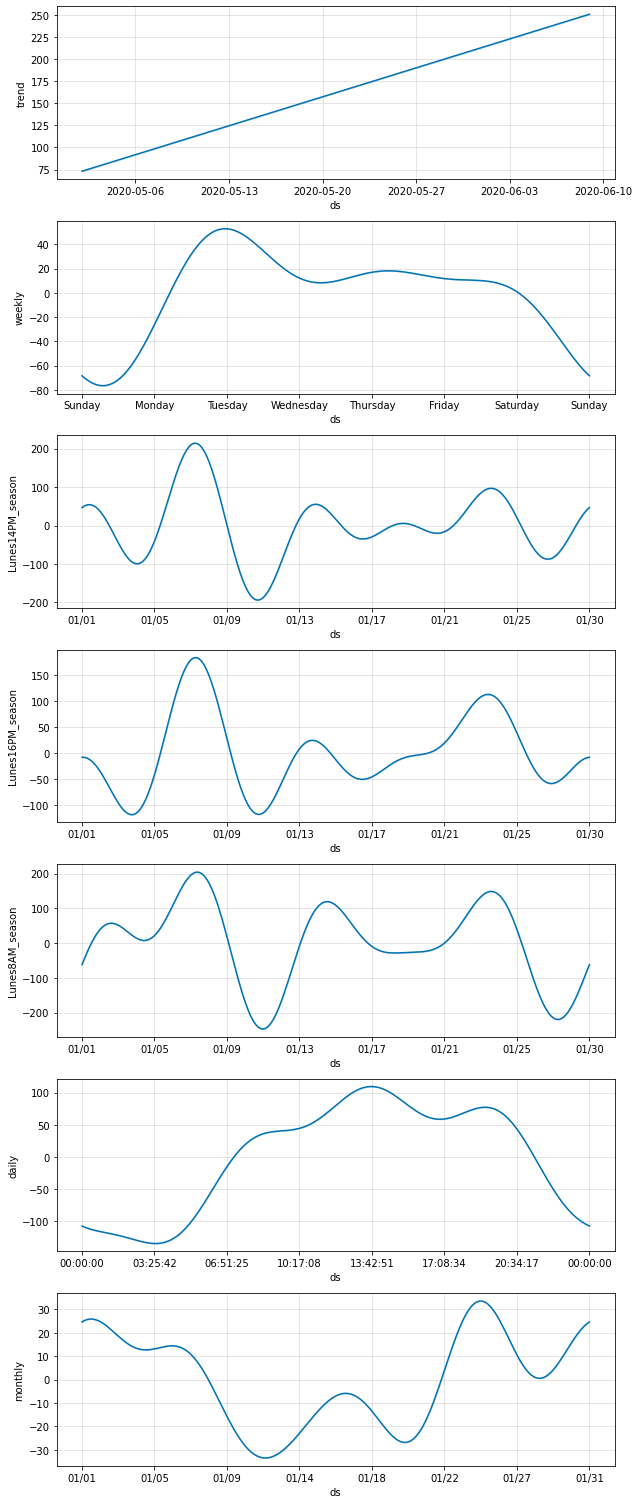

In [20]:
fig, predictions_rolling, history, future = rolling_forecast()

In [21]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data_D = test_data_D.set_index('ds')

In [22]:
residuals_rolling = test_data_D['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-06-08 00:00:00,7.639651
2020-06-08 01:00:00,-16.001493
2020-06-08 02:00:00,-59.109579
2020-06-08 03:00:00,-34.073009
2020-06-08 04:00:00,-31.327098


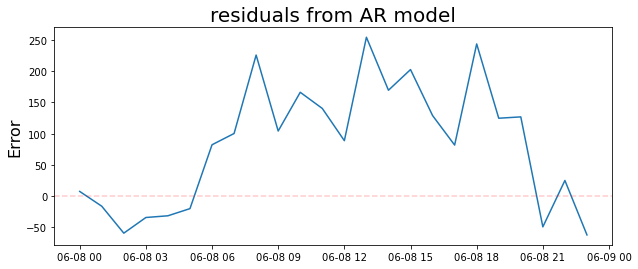

In [23]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

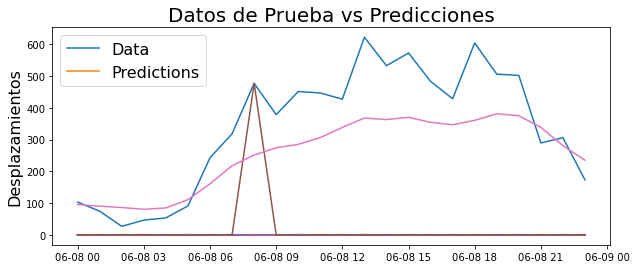

In [24]:
plt.figure(figsize=(10,4))
plt.plot(test_data_D)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

In [25]:
predictions_rolling.head(50)

,yhat
ds,
2020-06-08 00:00:00,95.525349
2020-06-08 01:00:00,90.528493
2020-06-08 02:00:00,86.107579
2020-06-08 03:00:00,80.577009
2020-06-08 04:00:00,84.969098
2020-06-08 05:00:00,111.116190
2020-06-08 06:00:00,160.593366
2020-06-08 07:00:00,217.827930
2020-06-08 08:00:00,251.222187


Text(0.5, 1.0, 'Datos de Prueba vs Predicciones')

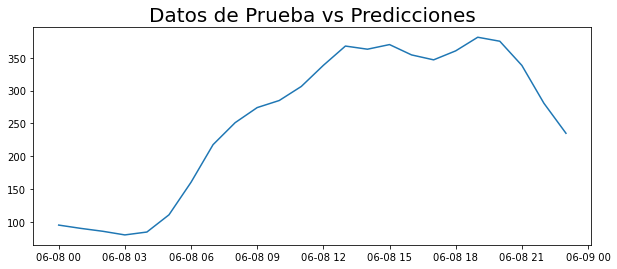

In [26]:
plt.figure(figsize=(10,4))
plt.plot(predictions_rolling)

#plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
#plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [27]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_D['y'])),4))

Mean Absolute Percent Error: 0.3899


# RMSE

In [28]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_D.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    128.431378
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


128.4313775501066

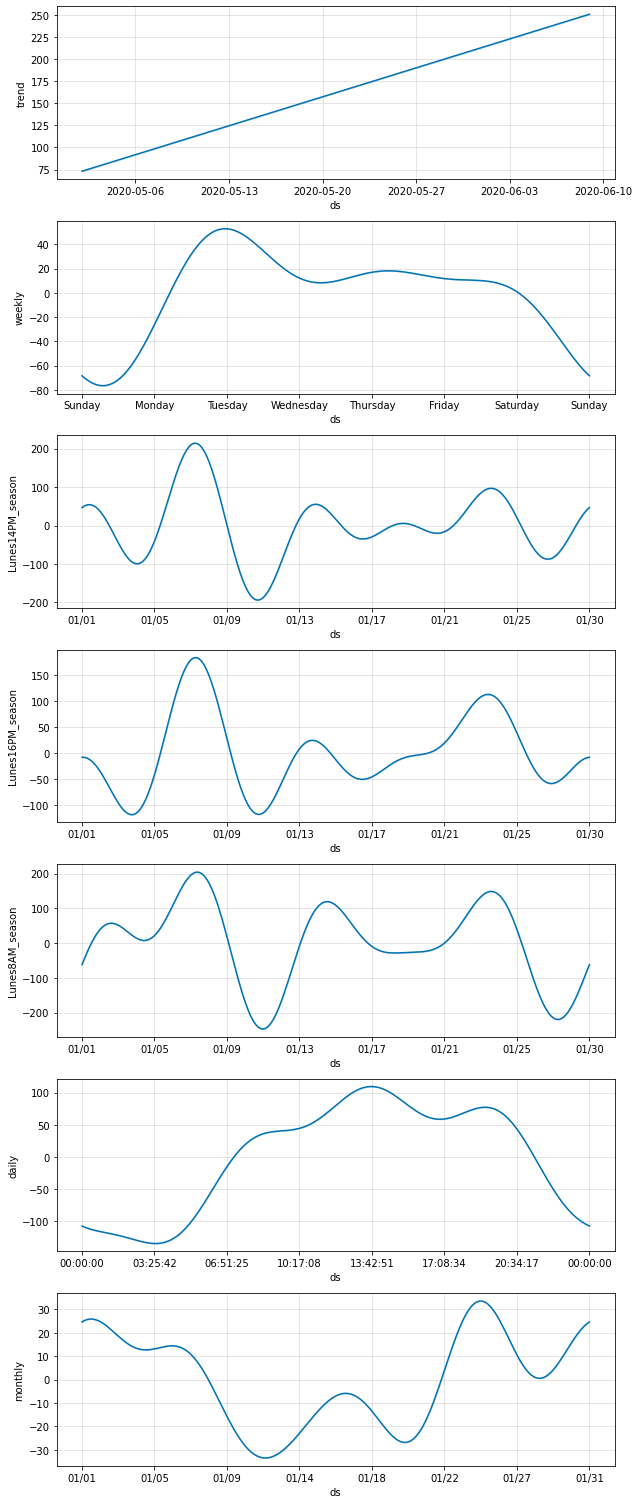

In [29]:
fig